## 행정안전부 도로명주소 API 활용

In [43]:
import requests, json       # requests: 인터넷으로 자료를 받아서  가지고 올때 사용(크롤링때씀)
import pandas as pd
from urllib.parse import quote  # quote: 인터넷 주소창에 한글 인코딩할때 사용
import folium

- API Key 가져오기

In [44]:
with open('keys/도로명주소apikey.txt') as file:
    road_key = file.read()

In [45]:
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'
params2 = f'keyword={quote("영등포역")}&resultType=json'
url = f'{base_url}?{params1}&{params2}'

In [46]:
homes = '샘터마을2단지아파트, 행신초등학교, 행신공원, 가라산, 롯데마트고양, 행신도서관'.split(',')
homes

['샘터마을2단지아파트', ' 행신초등학교', ' 행신공원', ' 가라산', ' 롯데마트고양', ' 행신도서관']

In [47]:
road_addr_list = []
for home in homes:
    params2 = f'keyword={quote(home)}&resultType=json'
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url)
    if result.status_code == 200:
       res = json.loads(result.text)
       road_addr_list.append(res['results']['juso'][0]['roadAddr'])
    else:
        print(result.status_code)

In [48]:
df = pd.DataFrame({
    '이름': homes, '주소':road_addr_list
})
df

,이름,주소
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)"
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동)
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동)
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동)
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동)
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동)


In [49]:
df.to_csv('data/우리집 인근.csv', index=False)      # index=False이걸해야 언네임드컬럼안뜸!! 기억!!
pd.read_csv('data/우리집 인근.csv')

,이름,주소
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)"
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동)
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동)
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동)
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동)
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동)


## 카카오 로컬 API 활용
- 도로명 주소 ---> 위도, 경도 좌표

In [50]:
with open('keys/카카오apikey.txt') as file:
    kakao_key = file.read()

In [51]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization': f'KakaoAK {kakao_key}'}

- Kakao Local API 호출하여 결과 가져오기

In [52]:
df = pd.read_csv('data/우리집 인근.csv')
df

,이름,주소
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)"
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동)
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동)
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동)
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동)
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동)


In [53]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df["주소"][i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [54]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,이름,주소,위도,경도
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)",37.620275,126.835920
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동),37.621942,126.836415
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동),37.618639,126.837243
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동),37.625640,126.841402
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동),37.625187,126.836144
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동),37.620759,126.828340


In [55]:
df.to_csv('data/우리집 인근2.csv', index=False)
pd.read_csv('data/우리집 인근2.csv')

,이름,주소,위도,경도
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)",37.620275,126.835920
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동),37.621942,126.836415
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동),37.618639,126.837243
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동),37.625640,126.841402
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동),37.625187,126.836144
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동),37.620759,126.828340


In [56]:
df = pd.read_csv('data/우리집 인근2.csv')
df

,이름,주소,위도,경도
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)",37.620275,126.835920
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동),37.621942,126.836415
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동),37.618639,126.837243
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동),37.625640,126.841402
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동),37.625187,126.836144
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동),37.620759,126.828340


In [57]:
df['image'] = ['data/images.jpg', 'data/학교.jpg', 'data/공원.jpg', 'data/가라산.jpg', 'data/롯데마트.png', 'data/도서관.png']
df

,이름,주소,위도,경도,image
0,샘터마을2단지아파트,"경기도 고양시 덕양구 충장로 118-30 (행신동, 샘터마을2단지아파트)",37.620275,126.835920,data/images.jpg
1,행신초등학교,경기도 고양시 덕양구 중앙로 527 (행신동),37.621942,126.836415,data/학교.jpg
2,행신공원,경기도 고양시 덕양구 행신로 197-2 (행신동),37.618639,126.837243,data/공원.jpg
3,가라산,경기도 고양시 덕양구 화신로 148-2 (행신동),37.625640,126.841402,data/가라산.jpg
4,롯데마트고양,경기도 고양시 덕양구 충장로 150 (행신동),37.625187,126.836144,data/롯데마트.png
5,행신도서관,경기도 고양시 덕양구 행당로33번길 25-6 (행신동),37.620759,126.828340,data/도서관.png



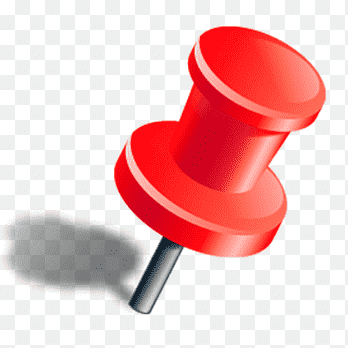
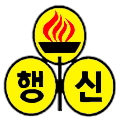
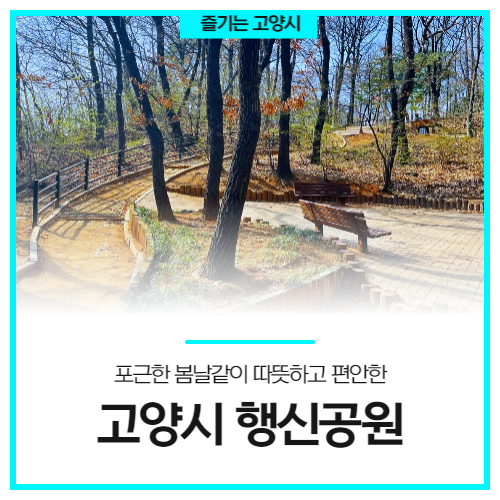
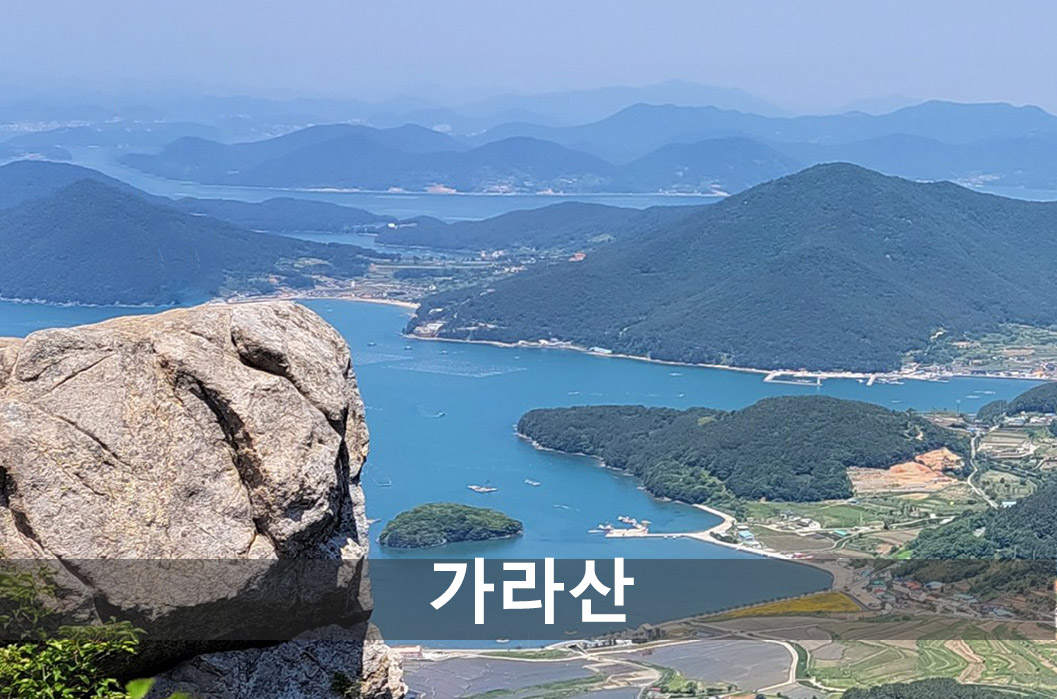
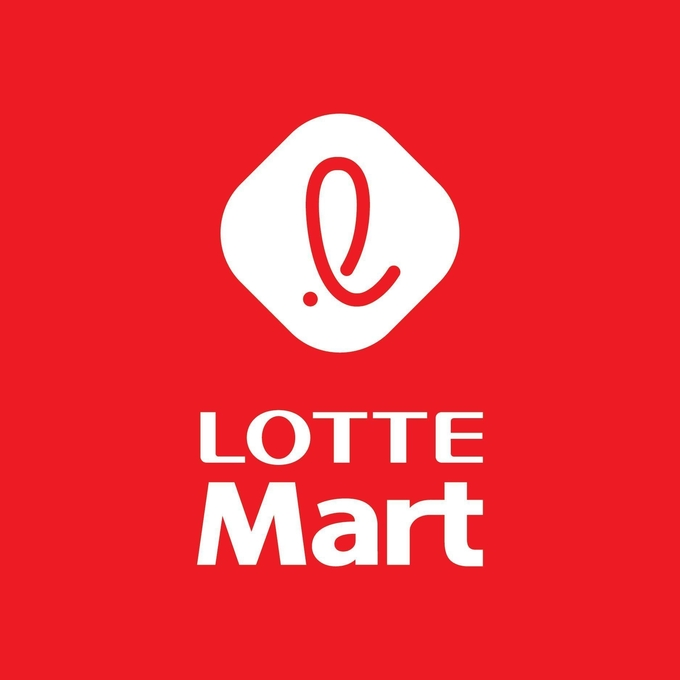
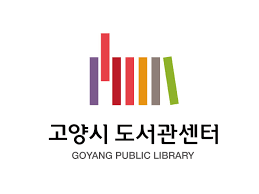

In [77]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=15) #Center position
for i in df.index:
    folium.Marker(
        location=[df.위도[i], df.경도[i]],
        icon=folium.CustomIcon(df.image[i], icon_size=(50,50)),
        tooltip=df.이름[i],
        popup=folium.Popup(df.주소[i], max_width=200)   
    ).add_to(map)
    folium.Marker(
        location=[df.위도[i],df.경도[i]],   
        icon = folium.DivIcon(icon_size=(1000,20), icon_anchor=(30,-20),
                              html=f'<span style="font-size: 10pt; background-color: white;">{df.이름[i]}</span>')
    ).add_to(map)

    
title_html = '<h3 align="center" style="font-size:20px">우리집 인근 장소</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map